# Data Analysis of Netflix Movies and TV Shows

### TV Shows and Movies listed on Netflix

This dataset consists of TV shows and movies availabe on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. 

In 2018, they released an interesting report which shows the streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. 

Integrating this dataset with other external datasets such as IMDB ratings and Rotten Tomatoes can also provide many interesting findings. 

### Inspiration

1. Understanding what content is available in different countries.
2. Identifying similar content by matching text-based features.
3. Network Analysis of Actors/Directors and find interesting insights.
4. Does Netflix have an increasing focus on TV rather than movies in recent years?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

### Read Data

In [2]:
# Making a list of missing value types
missing_values = ['n/a', 'na', '--']
netflix = pd.read_csv('netflix_titles.csv', na_values=missing_values)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Data Investigation

In [3]:
def data_inv(df):
    print('Netflix Movies and Shows: ', df.shape[0])
    print('Database Variables: ', df.shape[1])
    print('-' * 30)
    print('Dataset Columns: \n')
    print(df.columns)
    print('-' * 30)
    print('Datatype of Each Column: \n')
    print(df.dtypes)
    print('-' * 30)
    print('Missing Rows in Each Column: \n')
    c=df.isnull().sum()
    print(c[c > 0])
data_inv(netflix)

Netflix Movies and Shows:  6234
Database Variables:  12
------------------------------
Dataset Columns: 

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
------------------------------
Datatype of Each Column: 

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object
------------------------------
Missing Rows in Each Column: 

director      1969
cast           570
country        476
date_added      11
rating          10
dtype: int64


## Data Cleaning

- Drop the 'show_id' column
- Drop duplicated listings
- Replace the 10 missing rows in 'rating' with mode
- Replace the missing rows in 'date_added' with 'January 1, {release_year}
- Convert the 'date_added' column from object type to datetime

In [4]:
netflix = netflix.drop('show_id', axis=1)
netflix.shape[1]

11

In [5]:
print('There are', netflix[netflix.duplicated(['title', 'country', 'type', 'release_year'])].shape[0], 'rows that are duplicates.')

There are 2 rows that are duplicates.


In [6]:
netflix = netflix.drop_duplicates(['title', 'country', 'type', 'release_year'])
netflix.shape[0]

6232

In [7]:
netflix = netflix.reset_index()
netflix.head()

,index,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [8]:
netflix['rating'] = netflix['rating'].fillna(netflix['rating'].mode()[0])
netflix['rating'].value_counts()

TV-MA       2036
TV-14       1697
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [9]:
netflix['date_added'] = netflix['date_added'].fillna('January 1, {}'.format(str(netflix['release_year'].mode()[0])))
netflix['date_added'].isnull().sum()

0

In [10]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix.dtypes

index                    int64
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

## Exploratory Analysis

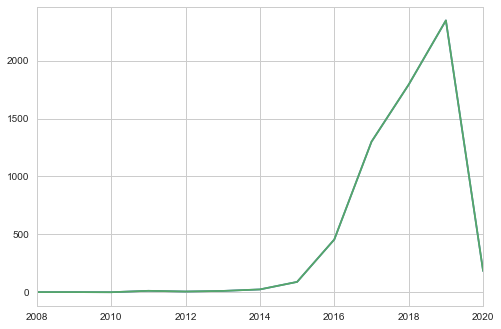

In [12]:
# Using a line graph, do we have enough data per year?
netflix.date_added.dt.year.dropna().astype(int).value_counts().sort_index().plot()
plt.show()

**We will not assume there is a sharp decline of titles in 2020 as there is only 18 days worth of information available from 2020 in the dataset.**

In [13]:
# removing rows from 2020 since there is only 18 days of data available
netflix.drop(netflix[netflix.date_added.dt.year == 2020].index, inplace=True)
netflix.shape

(6048, 12)

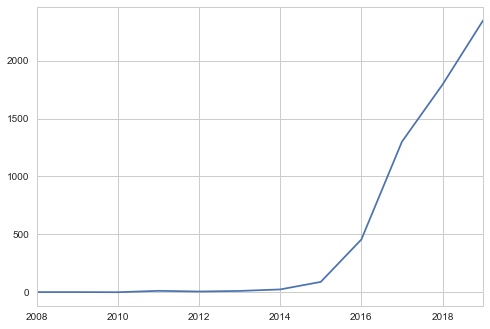

In [14]:
# line graph without 2020 information
netflix.date_added.dt.year.dropna().astype(int).value_counts().sort_index().plot()
plt.show()

### What content do we have?

In [15]:
netflix.type.value_counts()

Movie      4117
TV Show    1931
Name: type, dtype: int64

In [16]:
movie_cnt = len(netflix[netflix.type == 'Movie'])
tv_cnt = len(netflix[netflix.type == 'TV Show'])
print('Percentage of Movies: {:.1f}%'.format((movie_cnt / len(netflix.type)) * 100))
print('Percentage of TV Shows: {:.1f}%'.format((tv_cnt / len(netflix.type)) * 100))

Percentage of Movies: 68.1%
Percentage of TV Shows: 31.9%


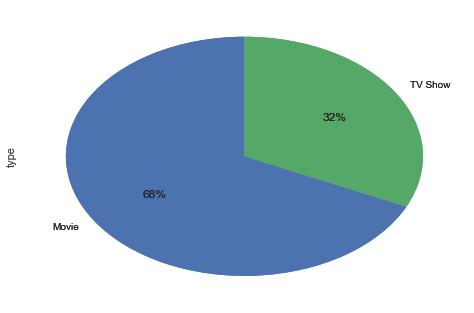

In [18]:
netflix.type.value_counts().plot(kind='pie', autopct='%1.f%%', startangle=90)
plt.show()

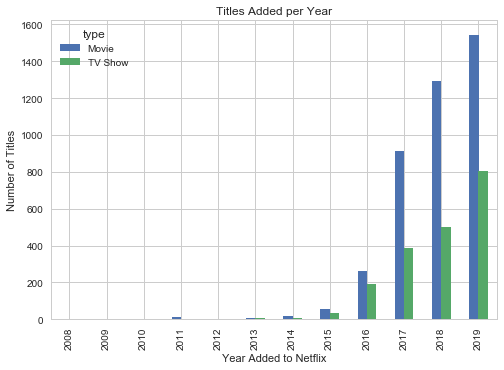

In [19]:
# How many titles are added each year?
pd.crosstab(netflix.date_added.dt.year, netflix.type).plot(kind = 'bar')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Number of Titles')
plt.title('Titles Added per Year')
plt.show()

In [20]:
# 'UR' (Unrated) rating is equivalent to 'NR' (Not Rated)
netflix['rating'] = netflix['rating'].replace(to_replace = 'UR', value = 'NR')

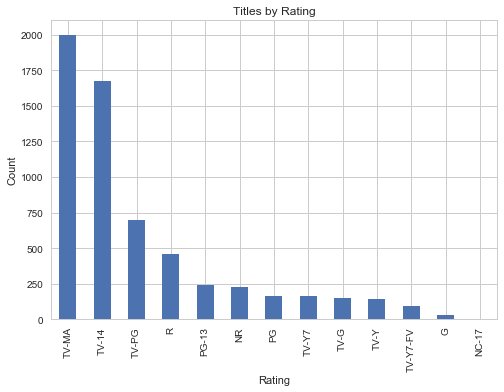

In [21]:
netflix['rating'].value_counts().plot(kind='bar')
plt.title('Titles by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

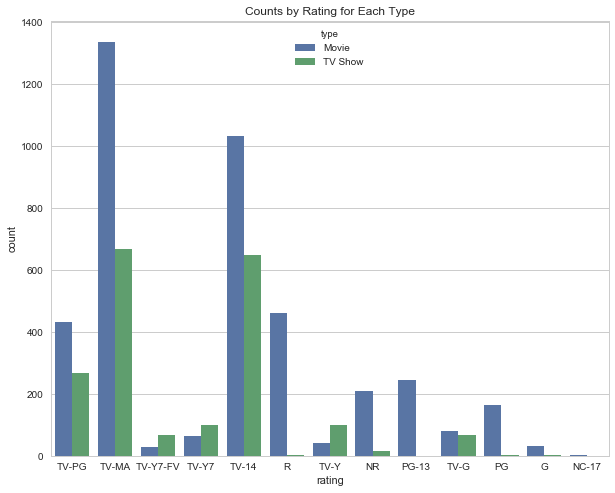

In [22]:
# Counts by Rating for each Type
plt.figure(figsize = (10, 8))
sns.countplot(x = 'rating', hue = 'type', data = netflix)
plt.title('Counts by Rating for Each Type')
plt.show()

In [23]:
# Counts by Country
netflix['country'].value_counts().sort_values(ascending=False).head()

United States     1948
India              769
United Kingdom     342
Japan              170
Canada             137
Name: country, dtype: int64

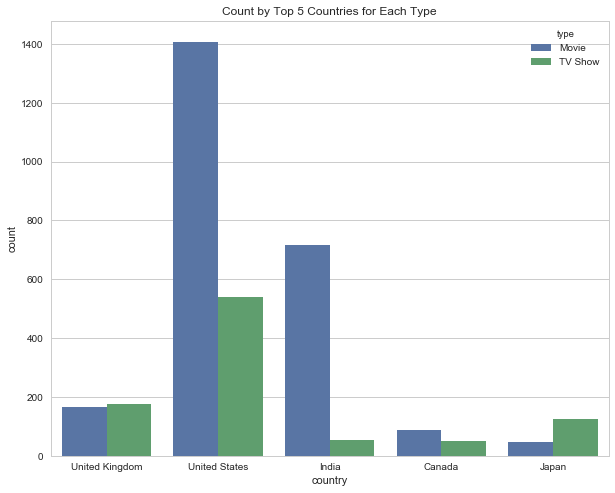

In [24]:
top_five_countries = netflix[
    (netflix.country == 'United States') | 
    (netflix.country == 'India') | 
    (netflix.country == 'United Kingdom') | 
    (netflix.country == 'Japan') | 
    (netflix.country == 'Canada')]
plt.figure(figsize = (10,8))
sns.countplot(x = 'country', hue = 'type', data = top_five_countries)
plt.title('Count by Top 5 Countries for Each Type')
plt.show()

## Thank you!